# Importing and Describing the dataset

In [143]:
import numba
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None  # default='warn'


In [144]:
data=pd.read_csv('dataset.csv')

In [145]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


In [146]:
#display all the column headers name to get a brief idea about the dataset content
list(data.columns)

['business_code',
 'cust_number',
 'name_customer',
 'clear_date',
 'buisness_year',
 'doc_id',
 'posting_date',
 'document_create_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'area_business',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'invoice_id',
 'isOpen']

In [147]:
#finding the parameter having null values which would decide how to train the model
data.isnull().sum(axis = 0)

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [148]:
#finding unique values among the dataset
data_unique=data.nunique()
print(data_unique)

business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64


In [149]:
#Display the Null values percentage against every columns
percent_missing = data.isnull().sum() * 100 / len(data)
print(percent_missing)

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.000
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.000
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64


In [150]:
data_invoice_doc=data[["invoice_id","doc_id"]]
print(data_invoice_doc)

         invoice_id        doc_id
0      1.930438e+09  1.930438e+09
1      1.929646e+09  1.929646e+09
2      1.929874e+09  1.929874e+09
3      2.960623e+09  2.960623e+09
4      1.930148e+09  1.930148e+09
...             ...           ...
49995  1.930797e+09  1.930797e+09
49996  1.929744e+09  1.929744e+09
49997  1.930537e+09  1.930537e+09
49998  1.930199e+09  1.930199e+09
49999  1.928576e+09  1.928576e+09

[50000 rows x 2 columns]


In [151]:
data1=data.drop(['area_business', 'posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'], axis = 1)
data1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200210.0,USD,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190811.0,USD,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190929.0,USD,2253.86,20190914.0,NAA8
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200410.0,CAD,3299.70,20200331.0,CA10
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191128.0,USD,33133.29,20191113.0,NAH4


In [152]:
#checking whether columns have been dropped or not
print(data.shape)
print(data1.shape)

(50000, 19)
(50000, 12)


In [153]:
#dropping the duplicate rows
data1.drop_duplicates(inplace=True)

In [154]:
#checking number of null values in new dataset
data1.isnull().sum(axis = 0)


business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

In [155]:
#checking percentage of null values in new dataset
percent_missing_data1 = data1.isnull().sum() * 100 / len(data1)
print(percent_missing_data1)

business_code            0.000000
cust_number              0.000000
name_customer            0.000000
clear_date              19.822273
buisness_year            0.000000
doc_id                   0.000000
posting_date             0.000000
due_in_date              0.000000
invoice_currency         0.000000
total_open_amount        0.000000
baseline_create_date     0.000000
cust_payment_terms       0.000000
dtype: float64


In [156]:
#checking dataypes of columns
print(data1['clear_date'].dtypes)
print(data1['posting_date'].dtypes)
print(data1['due_in_date'].dtypes)
print(data1['baseline_create_date'].dtypes)


object
object
float64
float64


In [157]:
#converting date columns into date time formats
#clear_date
#posting_date
#due_in_date
#baseline_create_date
data1['clear_date']=pd.to_datetime(data1['clear_date'])
data1['posting_date']=pd.to_datetime(data1['posting_date'])
data1['due_in_date']=pd.to_datetime(data1['due_in_date'],format='%Y%m%d')
data1['baseline_create_date']=pd.to_datetime(data1['baseline_create_date'],format='%Y%m%d')



In [158]:
#checking if datetime has been converted into the required format or not
print(data1['clear_date'].dtypes)
print(data1['posting_date'].dtypes)
print(data1['due_in_date'].dtypes)
print(data1['baseline_create_date'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [159]:
#converting CAD into USD currency of 'total_open_amount' column and printing the converted value under 'converted_usd' column 
data1['converted_usd']=np.where((data1['invoice_currency']== 'USD'),data1['total_open_amount'],data1['total_open_amount']*0.7)
print(data1['converted_usd'])
print(data1.shape)

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64
(48839, 13)


In [160]:
print(data1['buisness_year'])

0        2020.0
1        2019.0
2        2019.0
3        2020.0
4        2019.0
          ...  
49995    2020.0
49996    2019.0
49997    2020.0
49998    2019.0
49999    2019.0
Name: buisness_year, Length: 48839, dtype: float64


In [161]:
#dropping 'invoice_currency' and 'total_open_amount' columns
#also checking the shape of new dataframe
data1=data1.drop(['invoice_currency','total_open_amount'], axis = 1)
print(data1.shape)

(48839, 11)


In [162]:
data1.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

# Splitting the dataset

In [163]:
#checking for null values in all columns
data1.isnull().sum(axis = 0)


business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
baseline_create_date       0
cust_payment_terms         0
converted_usd              0
dtype: int64

In [164]:
maindata=data1[data1['clear_date'].isna()==False]
nulldata=data1[data1['clear_date'].isna()==True]

In [165]:
print(maindata.shape)
print(nulldata.shape)

(39158, 11)
(9681, 11)


In [166]:
maindata.head()


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [167]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


In [168]:
#creating delay column
Delay=maindata['clear_date']-maindata['due_in_date']
maindata=maindata.assign(Delay=Delay)
print(maindata.shape)

(39158, 12)


In [169]:
Delay

0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Length: 39158, dtype: timedelta64[ns]

In [170]:
#creating avgdelay
avgdelay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False)
print(maindata.shape)

(39158, 12)


In [171]:
#printing avgdelay column
avgdelay
maindata['avgdelay']=avgdelay
print(maindata.shape)

(39158, 13)


In [172]:
#mapping avgdelay with name_customer
maindata['avgdelay']=maindata['name_customer'].map(avgdelay)
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-3 days +07:08:49.779837776
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,19 days 00:00:00
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,8 days 02:10:54.545454545
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-3 days +19:33:27.692307693
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,71 days 10:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-1 days +14:45:00
49996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,4 days,-3 days +12:40:08.540925267
49997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,0 days,1 days 01:08:34.285714285
49998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1 days 13:36:42.985074626


In [173]:
#changing the format in seconds
maindata['avgdelay']=maindata['avgdelay'].dt.total_seconds().astype(int)


In [174]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avgdelay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-233470
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1641600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,699054
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-188792
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6172800


In [175]:
#dropping Delay and clear_date column
maindata=maindata.drop(['Delay','clear_date'],axis=1)


In [176]:
maindata

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avgdelay
0,U001,0200769623,WAL-MAR corp,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,-233470
1,U001,0200980828,BEN E,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,1641600
2,U001,0200792734,MDV/ trust,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,699054
4,U001,0200769623,WAL-MAR foundation,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-188792
5,CA02,0140106181,THE corporation,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,6172800
...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019.0,1.929601e+09,2019-07-10,2019-07-25,2019-07-10,NAC6,84780.400,-33300
49996,U001,0200769623,WAL-MAR co,2019.0,1.929744e+09,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-213591
49997,U001,0200772595,SAFEW associates,2020.0,1.930537e+09,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,90514
49998,U001,0200726979,BJ'S llc,2019.0,1.930199e+09,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,135402


# Splitting of Train and the Test Data

In [177]:
#splitting into x and y dataframe
x=maindata.iloc[:,:-1] 
# has remaining column
y=maindata.iloc[:,-1] 
# has only target column

In [178]:
#splitting into train and test dataset into 60:40 ratio
X_train, X_loc_test, y_train, y_loc_test=train_test_split(x, y, test_size=0.4, random_state=42)
print(X_train.shape,X_loc_test.shape,y_train.shape,y_loc_test.shape)



(23494, 10) (15664, 10) (23494,) (15664,)


In [179]:
#splitting into train and test dataset into 50:50 ratio
X_val, X_test, y_val, y_test=train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state=42)
print(X_val.shape, X_test.shape, y_val.shape, y_test.shape)

(7832, 10) (7832, 10) (7832,) (7832,)


# Exploratory Data Analysis

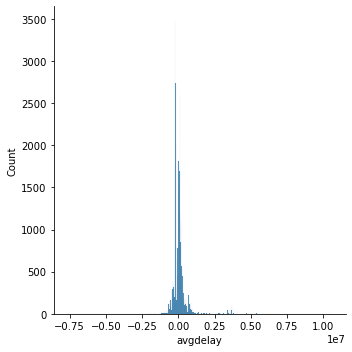

In [180]:
sns.displot(maindata, x="avgdelay")

# Feature Engineering

In [181]:
#it contains all columns excluding avgdelay
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
44556,U001,0200756072,REINHA corp,2019.0,1.929516e+09,2019-06-20,2019-07-05,2019-06-20,NAA8,54315.10
36713,U001,0200776463,KROGE corp,2020.0,1.930432e+09,2020-01-23,2020-02-07,2020-01-23,NAA8,52725.92
2639,U001,0200794332,COST systems,2019.0,1.928699e+09,2019-01-30,2019-02-14,2019-01-30,NAAX,21126.47
49682,U001,0200780383,MEIJ foundation,2020.0,1.930341e+09,2019-12-31,2020-01-15,2019-12-31,NAA8,143649.72
45201,U001,0200769623,WAL-MAR foundation,2019.0,1.929881e+09,2019-09-17,2019-10-02,2019-09-17,NAH4,14864.00


In [182]:
#custom function to drop buisness_code from train , test and val datset
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])


LabelEncoder()

In [183]:
#updated dataframe

X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

In [184]:
X_train['business_code'].head()

44556    U001
36713    U001
2639     U001
49682    U001
45201    U001
Name: business_code, dtype: object

In [185]:
X_train['business_code_enc'].head()

44556    1
36713    1
2639     1
49682    1
45201    1
Name: business_code_enc, dtype: int32

In [186]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [187]:
X_train ,X_val, X_test = custom(['business_code'])

In [188]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


In [189]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

In [190]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

In [191]:
X_train ,X_val, X_test = custom(['name_customer'])

In [192]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [193]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

In [194]:
#checking datatypes
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [195]:
#checking datatypes
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [196]:
#checking datatypes
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [197]:
#extracting date,month and year column for posting_date
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



In [198]:
#passing the custom function into posting_date
X_train ,X_val, X_test = custom(['posting_date'])

In [199]:
#extracting date,month and year column for baseline_create_date
X_train['day_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_baselinecreatedate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_baselinecreatedate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_baselinecreatedate'] = X_test['baseline_create_date'].dt.year



In [200]:
#passing the custom function into the baseline_create_date
X_train ,X_val, X_test = custom(['baseline_create_date'])

In [201]:
#extracting the date,month and year column from due_in_date
X_train['day_of_dueindate'] = X_train['due_in_date'].dt.day
X_train['month_of_dueindate'] = X_train['due_in_date'].dt.month
X_train['year_of_dueindate'] = X_train['due_in_date'].dt.year

X_val['day_of_dueindate'] = X_val['due_in_date'].dt.day
X_val['month_of_dueindate'] = X_val['due_in_date'].dt.month
X_val['year_of_dueindate'] = X_val['due_in_date'].dt.year


X_test['day_of_dueindate'] = X_test['due_in_date'].dt.day
X_test['month_of_dueindate'] = X_test['due_in_date'].dt.month
X_test['year_of_dueindate'] = X_test['due_in_date'].dt.year



In [202]:
#passing custom function into due_in_date
X_train ,X_val, X_test = custom(['due_in_date'])

In [203]:
#checking datatypes
X_train.dtypes

cust_number                      int32
buisness_year                  float64
doc_id                         float64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int32
cust_payment_terms_enc           int32
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

In [204]:
#checking datatypes
X_test.dtypes

cust_number                      int32
buisness_year                  float64
doc_id                         float64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int32
cust_payment_terms_enc           int32
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

In [205]:
#checking datatypes
X_val.dtypes

cust_number                      int32
buisness_year                  float64
doc_id                         float64
converted_usd                  float64
business_code_enc                int32
name_customer_enc                int32
cust_payment_terms_enc           int32
day_of_postingdate               int64
month_of_postingdate             int64
year_of_postingdate              int64
day_of_baselinecreatedate        int64
month_of_baselinecreatedate      int64
year_of_baselinecreatedate       int64
day_of_dueindate                 int64
month_of_dueindate               int64
year_of_dueindate                int64
dtype: object

# Feature Selection

In [206]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

In [207]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


In [208]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [209]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [210]:
train=X_train.copy()
list(handling_correlation(train.copy(),0.85))

['month_of_dueindate',
 'day_of_baselinecreatedate',
 'year_of_postingdate',
 'year_of_dueindate',
 'month_of_baselinecreatedate',
 'year_of_baselinecreatedate']

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

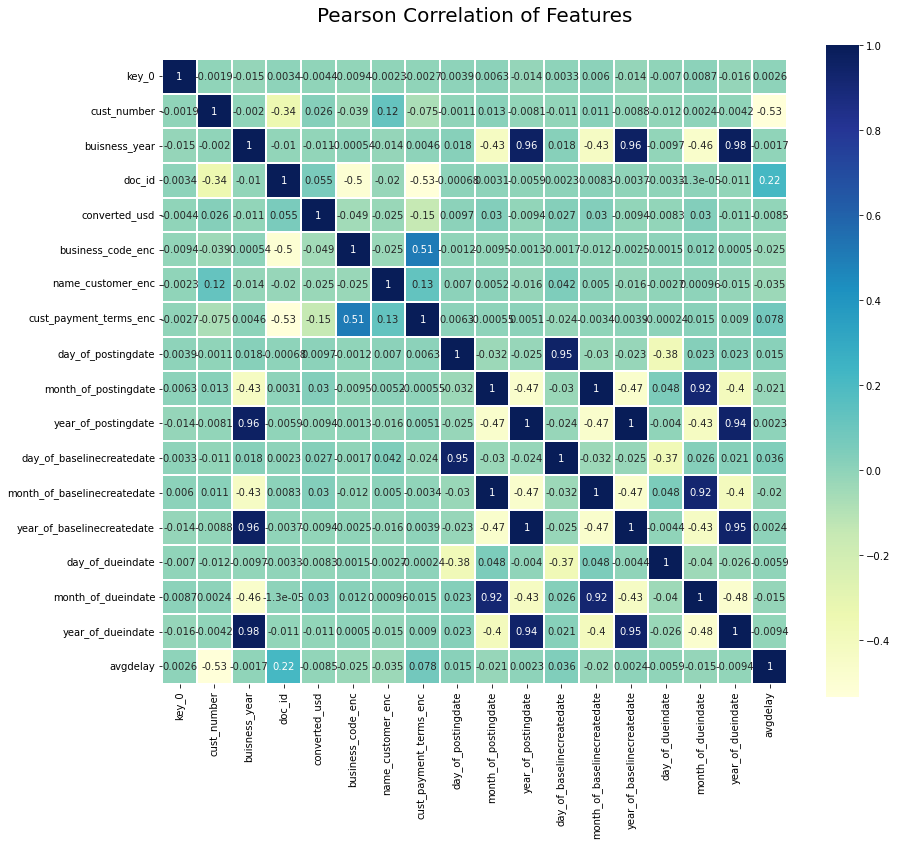

In [211]:
#heatmap for X_train
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='YlGnBu', linecolor='white', annot=True)

In [212]:
#Calling variance threshold for threshold value = 0.8
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [213]:
#features columns are
#'year_of_createdate'
#'year_of_due'
#'day_of_createdate'
#'year_of_postingdate'
#'month_of_due'
#'month_of_createdate'


# Modelling

In [214]:
#models we will be using to pick out the best prediction
#Linear Regression
#Decision Tree Regression
#Random Forest Regression
#Support Vector Regression
#Extreme Gradient Boost Regression

In [215]:

MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [216]:
#starting with baseline linear regression model
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

In [217]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [218]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

515943.2077170999

In [219]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[320162455442.0826],[0.3217534254138449],

In [220]:
#starting with the baseline model Support Vector Regression
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)

# Predicting the Test Set Results
predicted= regressor.predict(X_test)

In [221]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [222]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

651773.7696541795

In [223]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[320162455442.0826, 477086082793.71533],[0.3217534254138449, -0.010680658950968702],

In [224]:
#next model would be Decision Tree Regression
# Fitting Decision Tree to the Training Set
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegression')
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = reg.predict(X_test)

In [225]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [226]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

651773.7696541795

In [227]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression'],[320162455442.0826, 477086082793.71533, 230215154200.85318],[0.3217534254138449, -0.010680658950968702, 0.5123018420790493],

In [228]:
#next model would be Random Forest Regression
#import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('RandomForestRegression')
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

# Predicting the Test Set Results
predicted=rf.predict(X_test)

In [229]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [230]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

651773.7696541795

In [231]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegression'],[320162455442.0826, 477086082793.71533, 230215154200.85318, 114760351937.67607],[0.3217534254138449, -0.010680658950968702, 0.5123018420790493, 0.7568864984729262],

In [232]:
#last but not the least model would be XGBoost or Extreme Gradient Boost Regression
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

In [233]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [234]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

328868.6323071458

In [235]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'DecisionTreeRegression', 'RandomForestRegression', 'XGB Regressor'],[320162455442.0826, 477086082793.71533, 230215154200.85318, 114760351937.67607, 111304097176.71237],[0.3217534254138449, -0.010680658950968702, 0.5123018420790493, 0.7568864984729262, 0.7642083843239198],

In [236]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
Comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.201625e+11,0.321753
1,Support Vector Regression,4.770861e+11,-0.010681
2,DecisionTreeRegression,2.302152e+11,0.512302
3,RandomForestRegression,1.147604e+11,0.756886
4,XGB Regressor,1.113041e+11,0.764208


In [237]:
#selecting best fit modelfrom comparision table
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [238]:
#Calculating the Mean Square Error for test dataset
mean_squared_error(y_test,predictedfinal,squared=False)

333622.68684355443

In [239]:
#Calculating the Mean Square Error for validation dataset
mean_squared_error(y_val,predictedfinal,squared=False)

901226.633653521

In [240]:
#calculate r2 score for test
r2_score(y_test, predicted)

0.7642083843239198

In [241]:
#calculate r2 score for validation
r2_score(y_val, predicted)

-0.9263529689256478

In [242]:
accuracy = round(regressorfinal.score(X_train, y_train)*100,2)
print(round(accuracy, 2), '%')

95.23 %


In [243]:
accuracy = round(regressorfinal.score(X_val, y_val)*100,2)
print(round(accuracy, 2), '%')

74.35 %


In [244]:
accuracy = round(regressorfinal.score(X_test, y_test)*100,2)
print(round(accuracy, 2), '%')

76.42 %


# I chose Xgboost as the final machine learning model because MSE_score is highest and R2_score is least among all the models giving best fittings and perfect model results.

In [245]:
#display the null data
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06
...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64


In [246]:
#Check for the number of rows and columns in the nulldata
nulldata.shape


(9681, 11)

In [247]:
#Check the Description and Information of the nulldata
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [248]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


Storing the Nulldata into a different dataset
for BACKUP

In [249]:
backup=nulldata.copy(deep=True)

In [250]:
#Call the Label Encoder for Nulldata
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

In [251]:
#Now you need to manually replacing str values with numbers
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns

In [252]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

In [253]:
#Use Label Encoder1 of all the following columns
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])

In [254]:
#Check for the datatypes of all the columns of Nulldata
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

Now you need to drop all the unnecessary columns -
'business_code'
"baseline_create_date"
"due_in_date"
"posting_date"
"name_customer"
"clear_date"
"cust_payment_terms"
'day_of_cleardate'
"month_of_cleardate"
"year_of_cleardate"

In [255]:
nulldata.drop(columns=['business_code','baseline_create_date','due_in_date','posting_date','name_customer','clear_date','cust_payment_terms','day_of_cleardate','month_of_cleardate','year_of_cleardate'],axis=1, inplace=True)

In [256]:
#Check the information of the "nulldata" dataframe
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

In [257]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 6118 to 44809
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_number                  7832 non-null   int32  
 1   buisness_year                7832 non-null   float64
 2   doc_id                       7832 non-null   float64
 3   converted_usd                7832 non-null   float64
 4   business_code_enc            7832 non-null   int32  
 5   name_customer_enc            7832 non-null   int32  
 6   cust_payment_terms_enc       7832 non-null   int32  
 7   day_of_postingdate           7832 non-null   int64  
 8   month_of_postingdate         7832 non-null   int64  
 9   year_of_postingdate          7832 non-null   int64  
 10  day_of_baselinecreatedate    7832 non-null   int64  
 11  month_of_baselinecreatedate  7832 non-null   int64  
 12  year_of_baselinecreatedate   7832 non-null   int64  
 13  day_of_dueinda

In [258]:
#Compare "nulldata" with the "X_test" dataframe
nulldata.shape, X_test.shape

((9681, 16), (7832, 16))

In [259]:
#editing the sequence of "nulldata", similar to the "X_test" dataframe
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_baselinecreatedate', 'month_of_baselinecreatedate',
       'year_of_baselinecreatedate', 'day_of_dueindate', 'month_of_dueindate',
       'year_of_dueindate'],
      dtype='object')

In [260]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [261]:
#Storing the Nulldata with new sequence into a new dataframe
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

In [262]:
nulldata2.shape

(9681, 16)

# Displaying the final dataset

In [263]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2309.79,65,2694,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.02,65,2777,21,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.59,65,96,21,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.65,65,2008,21,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.06,65,729,36,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,200769623,2020.0,1.930625e+09,13114.99,65,2979,34,10,3,2020,10,3,2020,25,3,2020
49980,200769623,2020.0,1.930851e+09,8899.71,65,2977,34,3,5,2020,3,5,2020,18,5,2020
49982,200148860,2020.0,1.930638e+09,4967.06,65,803,21,11,3,2020,11,3,2020,26,3,2020
49992,200900909,2020.0,1.930702e+09,1998.64,65,2738,21,25,3,2020,25,3,2020,9,4,2020


In [264]:
#passing this dataset into you final model and store it into "final_result"
final_result=regressorfinal.predict(nulldata2)
final_result

array([1434917.   ,  512630.7  , -231944.11 , ..., -380319.97 ,
        421755.6  ,   78912.984], dtype=float32)

In [265]:
# making the final_result as dataframe, with a column name "avg_delay"
final_result = pd.Series(final_result, name='avg_delay')

In [266]:
#Displaying the "avg_delay" column
final_result[0]//86400

16.0

In [267]:
#merging this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps
backup.reset_index(drop=True,inplace=True)
Final = backup.merge(final_result , on = nulldata.index )

# Displaying the "Final" dataframe

In [268]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,1.434917e+06
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,5.126307e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-2.319441e+05
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,4.599516e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-2.844162e+05


In [269]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,1.434917e+06
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,5.126307e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,-2.319441e+05
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,4.599516e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,-2.844162e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,1.335794e+06
9677,49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,1.105566e+06
9678,49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,-3.803200e+05
9679,49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,4.217556e+05


In [270]:
Final.shape

(9681, 13)

In [271]:
#converting the below fields back into date and time format

In [272]:
Final['avg_delay']=Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

In [273]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='D')

In [274]:
Final['clear_date']

0      2020-04-26
1      2020-04-08
2      2020-03-23
3      2020-05-05
4      2020-04-22
          ...    
9676   2020-04-09
9677   2020-05-30
9678   2020-03-21
9679   2020-04-13
9680   2020-05-06
Name: clear_date, Length: 9681, dtype: datetime64[ns]

In [275]:
Final[['clear_date', 'due_in_date']]

,clear_date,due_in_date
0,2020-04-26,2020-04-10
1,2020-04-08,2020-04-03
2,2020-03-23,2020-03-26
3,2020-05-05,2020-04-30
4,2020-04-22,2020-04-26
...,...,...
9676,2020-04-09,2020-03-25
9677,2020-05-30,2020-05-18
9678,2020-03-21,2020-03-26
9679,2020-04-13,2020-04-09


In [276]:
#Converting the average delay into number of days format

In [277]:
Final['avg_delay']=Final['avg_delay'].astype(int)
Final['avg_delay']

0       16
1        5
2       -3
3        5
4       -4
        ..
9676    15
9677    12
9678    -5
9679     4
9680     0
Name: avg_delay, Length: 9681, dtype: int32

In [278]:
#converting average delay column into bucket
bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

In [279]:
#drop "key_0" and "avg_delay" columns from the "Final" Dataframe
Final.drop(columns=['key_0','avg_delay'], axis=1, inplace=True)

In [280]:
Final['Aging Bucket'].value_counts()

0-15               5477
16-30              2923
31-45                80
Greatar than 60       4
46-60                 1
Name: Aging Bucket, dtype: int64

In [281]:
#Displaying final dataset with aging buckets
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-26,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79,16-30
1,U001,0200744019,TARG us,2020-04-08,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02,0-15
2,U001,0200418007,AM,2020-03-23,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59,NaN
3,U001,0200739534,OK systems,2020-05-05,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65,0-15
4,U001,0200353024,DECA corporation,2020-04-22,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200769623,WAL-MAR in,2020-04-09,2020.0,1.930625e+09,2020-03-10,2020-03-25,2020-03-10,NAH4,13114.99,16-30
9677,U001,0200769623,WAL-MAR corporation,2020-05-30,2020.0,1.930851e+09,2020-05-03,2020-05-18,2020-05-03,NAH4,8899.71,0-15
9678,U001,0200148860,DOLLA co,2020-03-21,2020.0,1.930638e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,4967.06,NaN
9679,U001,0200900909,SYSCO co,2020-04-13,2020.0,1.930702e+09,2020-03-25,2020-04-09,2020-03-25,NAA8,1998.64,0-15


In [282]:
 #Store this dataframe into the .csv format
Final.to_csv('HRC_project_prakhar.csv')

# End of the project